In [97]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
PATH= '/content/drive/Shareddrives/Los mejorcitos/BD 810/BD 810/'

In [99]:
##SANA
image1 = cv2.imread(PATH + "Copia de 1" + ".jpg", cv2.IMREAD_COLOR)

image4 = cv2.imread(PATH + "Copia de 100" + ".jpg", cv2.IMREAD_COLOR)
image7 = cv2.imread(PATH + "Copia de 260" + ".jpg", cv2.IMREAD_COLOR)

##RUST (Roya)
image2 = cv2.imread(PATH + "Copia de 342" + ".jpg", cv2.IMREAD_COLOR)
image5 = cv2.imread(PATH + "Copia de 275" + ".jpg", cv2.IMREAD_COLOR)
image8 = cv2.imread(PATH + "Copia de 500" + ".jpg", cv2.IMREAD_COLOR)

##SCAB (Sarna)
image3 = cv2.imread(PATH + "Copia de 588" + ".jpg", cv2.IMREAD_COLOR)
image6 = cv2.imread(PATH + "Copia de 600" + ".jpg", cv2.IMREAD_COLOR)
image9 = cv2.imread(PATH + "Copia de 700" + ".jpg", cv2.IMREAD_COLOR)

# MÉTODOS DE COLORES

In [100]:
def retinex_correction(image, sigma=50):
    # Aplicar la corrección de brillo
    #imagen_ajustada = correccion_brillo_adaptativo(image)
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde
    # Definir el rango de color adicional en HSV para detectar el tono de verde específico
    #lower_green_additional = np.array([99, 0, 63])
    #upper_green_additional = np.array([119, 19, 73])
    lower_green_additional = np.array([25, 0, 0])
    upper_green_additional = np.array([40, 255, 255])
    # Definir el rango de color adicional en HSV para detectar el tono de verde específico
    lower_green_additional_2 = np.array([50, 0, 0])
    upper_green_additional_2 = np.array([70, 255, 255])

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar la máscara adicional de zona verde más birllante
    mask_additional = cv2.inRange(hsv, lower_green_additional, upper_green_additional)

    # Aplicar la máscara adicional 2 al espacio de color HSV
    mask_additional_2 = cv2.inRange(hsv, lower_green_additional_2, upper_green_additional_2)

      # Combinar las máscaras actual y adicional
    mask_combined = cv2.bitwise_or(green_mask, mask_additional)

    # Combinar las máscaras actual, adicional y adicional 2
    mask_combined = cv2.bitwise_or(mask_combined, mask_additional_2)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(mask_combined, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

    # Retornar la imagen segmentada de la zona verde
    return green_segmented

Text(0.5, 1.0, 'Scab')

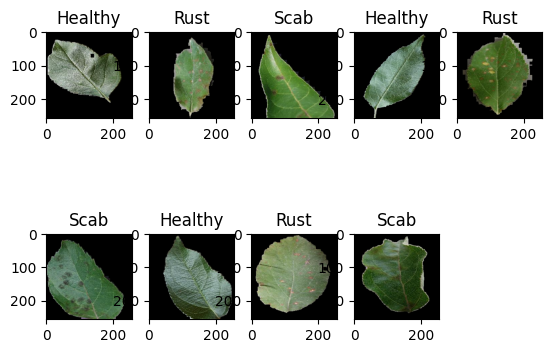

In [101]:
# Preprocesar la imagen
green_segmented1 = preprocess_image(image1)
green_segmented2 = preprocess_image(image2)
green_segmented3 = preprocess_image(image3)
green_segmented4 = preprocess_image(image4)
green_segmented5 = preprocess_image(image5)
green_segmented6 = preprocess_image(image6)
green_segmented7 = preprocess_image(image7)
green_segmented8 = preprocess_image(image8)
green_segmented9 = preprocess_image(image9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(green_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(green_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(green_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(green_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(green_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(green_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(green_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(green_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(green_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Eliminando zonas verdes

In [102]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_green = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    # Definir el rango de colores verde en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])

    # Crear una máscara para eliminar las partes verdes de la hoja
    green_mask = cv2.inRange(hsv_green, lower_green, upper_green)

    # Aplicar la máscara para eliminar las partes verdes de la imagen segmentada
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=cv2.bitwise_not(green_mask))

    return disease_segmented

Text(0.5, 1.0, 'Scab')

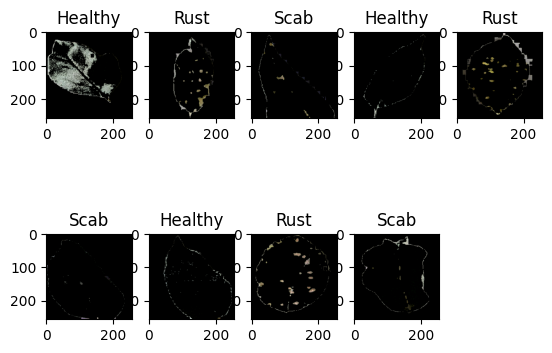

In [103]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Resaltando zonas cafes, amarillas, negras

In [104]:
import cv2
import numpy as np

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    # Definir los rangos de colores para la segmentación
    yellow_range = [(24, 50, 50), (34, 255, 255)]
    orange_range = [(18, 50, 50), (28, 255, 255)]
    dark_brown_range = [(10, 30, 20), (20, 255, 90)]
    light_brown_range = [(20, 20, 50), (50, 120, 180)]
    black_range = [(0, 0, 0), (180, 255, 50)]
    #dark_green_range = [(40, 50, 30), (60, 255, 100)]
    #light_green_range = [(65, 20, 50), (85, 120, 180)]

    # Aplicar las máscaras de segmentación a la imagen en HSV
    yellow_mask = cv2.inRange(hsv_image, np.array(yellow_range[0]), np.array(yellow_range[1]))
    orange_mask = cv2.inRange(hsv_image, np.array(orange_range[0]), np.array(orange_range[1]))
    dark_brown_mask = cv2.inRange(hsv_image, np.array(dark_brown_range[0]), np.array(dark_brown_range[1]))
    light_brown_mask = cv2.inRange(hsv_image, np.array(light_brown_range[0]), np.array(light_brown_range[1]))
    black_mask = cv2.inRange(hsv_image, np.array(black_range[0]), np.array(black_range[1]))
    #dark_green_mask = cv2.inRange(hsv_image, np.array(dark_green_range[0]), np.array(dark_green_range[1]))
    #light_green_mask = cv2.inRange(hsv_image, np.array(light_green_range[0]), np.array(light_green_range[1]))

    # Combinar las máscaras
    combined_mask = yellow_mask + orange_mask + dark_brown_mask + light_brown_mask + black_mask

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=combined_mask)

    return disease_segmented


Text(0.5, 1.0, 'Scab')

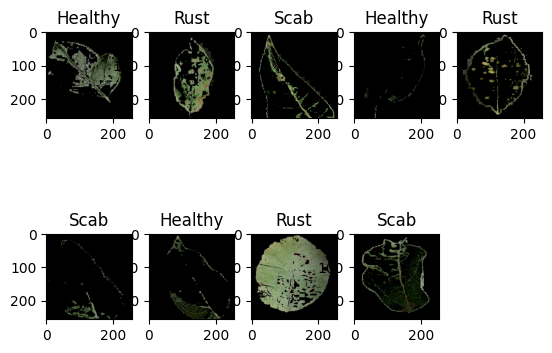

In [105]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

Con el intento 5 de la Segmentación>Uno>Final Segmentacion>Método 5

In [106]:
import cv2
import numpy as np

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    lower_range = np.array([0, 50, 50])
    upper_range = np.array([30, 255, 255])

    # Crear una máscara para los píxeles dentro del rango
    mask = cv2.inRange(hsv_image, lower_range, upper_range)

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented


Text(0.5, 1.0, 'Scab')

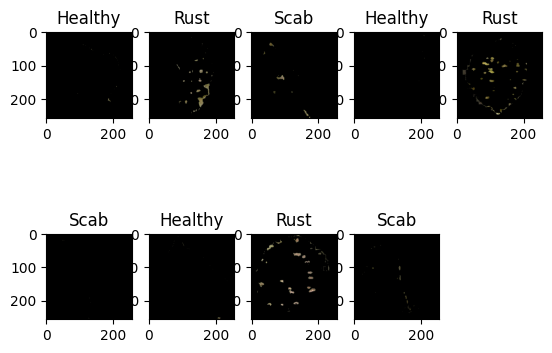

In [107]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

# METODOS DE REGIONES

## Usando el método MSER

In [111]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a escala de grises
    gray_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2GRAY)

    # Inicializar el detector MSER
    mser = cv2.MSER_create()

    # Detectar las regiones extremas estables
    regions, _ = mser.detectRegions(gray_image)

    # Crear una máscara vacía del mismo tamaño que la imagen
    mask = np.zeros_like(gray_image)

    # Dibujar las regiones detectadas en la máscara
    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), -1)

    # Aplicar la máscara a la imagen original
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented

Text(0.5, 1.0, 'Scab')

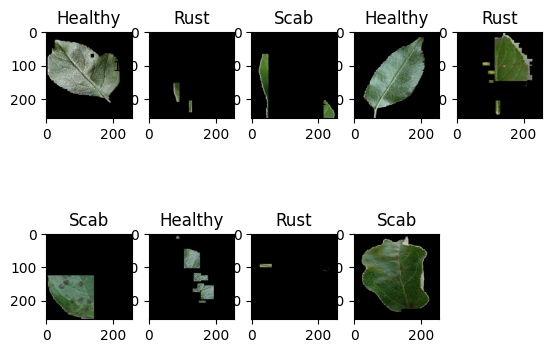

In [112]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Identificando regiones

Canny

In [113]:

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a escala de grises
    gray_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2GRAY)

    # Aplicar el operador de Canny para detectar los bordes
    edges = cv2.Canny(gray_image, 30, 100)

    # Aplicar umbralización para obtener una máscara binaria
    _, threshold = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((3, 3), np.uint8)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=2)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

    # Aplicar la máscara a la imagen original
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=threshold)

    return disease_segmented

Text(0.5, 1.0, 'Scab')

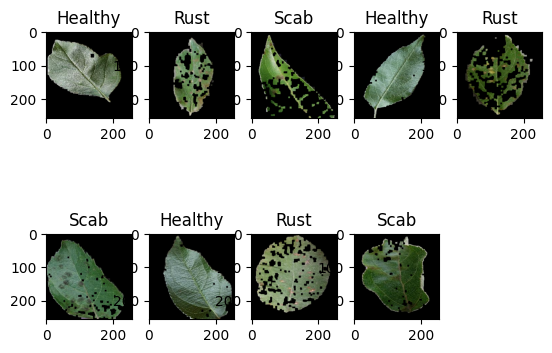

In [114]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

# MÉTODO DE COLOR 5 CON MEJORAMIENTO DE LA IMAGEN PARA RESALTAR MÁS ZONAS ENFERMAS FUNCIONA MUY BIEN EN RUST (ROYA)

Función para mejorar la imagen segmentada con color verde

In [108]:
def analisis_frecuencia(image):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la Transformada Rápida de Fourier (FFT)
    fft_imagen = np.fft.fftshift(np.fft.fft2(imagen_gris))

    # Calcular el espectro de frecuencia
    espectro_frecuencia = 20 * np.log(np.abs(fft_imagen))

    # Visualizar el espectro de frecuencia
    plt.imshow(espectro_frecuencia, cmap='gray')
    plt.colorbar()
    plt.title('Espectro de Frecuencia')
    plt.show()

def determinar_sigma(image):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la Transformada Rápida de Fourier (FFT)
    fft_imagen = np.fft.fftshift(np.fft.fft2(imagen_gris))

    # Calcular el espectro de frecuencia
    espectro_frecuencia = np.abs(fft_imagen)

    # Obtener las coordenadas del máximo en el espectro de frecuencia
    maximo_idx = np.unravel_index(np.argmax(espectro_frecuencia), espectro_frecuencia.shape)

    # Calcular el radio del máximo en el espectro de frecuencia
    radio = np.sqrt((maximo_idx[0] - espectro_frecuencia.shape[0]//2)**2 +
                    (maximo_idx[1] - espectro_frecuencia.shape[1]//2)**2)

    # Definir el valor de sigma en función del radio
    sigma = int(0.1 * radio)

    return sigma

def filtro_paso_alto_gaussiano(image, sigma):
    # Aplicar filtro Gaussiano a la imagen original
    ksize = int(2 * round(2 * sigma) + 1)

    # Aplicar filtro Gaussiano a la imagen original
    imagen_suavizada = cv2.GaussianBlur(image, (ksize, ksize), sigma)

    # Calcular la diferencia entre la imagen original y la suavizada
    filtro_paso_alto = cv2.subtract(image, imagen_suavizada)
    return filtro_paso_alto

def resta_imagenes(imagen_original, imagen_suavizada):
    # Realizar la resta de imágenes
    diferencia = cv2.subtract(imagen_original, imagen_suavizada)
    return diferencia

In [109]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    sigma =  determinar_sigma(green_segmented)
    imagen_suavizada = filtro_paso_alto_gaussiano(green_segmented, sigma)
    green_segmented = resta_imagenes(green_segmented, imagen_suavizada)


    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    lower_range = np.array([0, 50, 50])
    upper_range = np.array([30, 255, 255])

    # Crear una máscara para los píxeles dentro del rango
    mask = cv2.inRange(hsv_image, lower_range, upper_range)

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented


Text(0.5, 1.0, 'Scab')

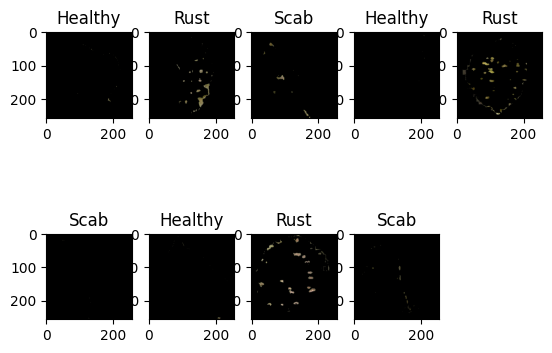

In [110]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')